# This notebook shows the learnning curve as a free-form of visualization on the project.

In [1]:
import pandas as pd
import matplotlib as plt
import string
import nltk
import re
import unicodedata
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nalindakulathunga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
filenames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
with open('combined_reviews.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())
            
Combined_DF = pd.read_csv("combined_reviews.txt", sep='\t', names = ["Review", "Label"])
Combined_DF = Combined_DF.sample(frac=1).reset_index(drop=True)

In [4]:
print Combined_DF.head(10)

                                              Review  Label
0                                        WORTHWHILE.      1
1  So don't go there if you are looking for good ...      0
2  Overall, the film is interesting and thought-p...      1
3  This is some seriously good pizza and I'm an e...      1
4  The handsfree part works fine, but then the ca...      1
5        The nano stated it.My son was dissapointed.      0
6  I bought these hoping I could make my Bluetoot...      0
7  We have tried 2 units and they both failed wit...      0
8                           Excellent performance.        1
9  This is a really fantastic Thai restaurant whi...      1


In [5]:
Combined_Df_RW = Combined_DF.drop('Label', axis=1)
Combined_Df_LB = Combined_DF["Label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Combined_Df_RW, Combined_Df_LB, test_size=0.33, random_state=42)

In [7]:
print len(X_train)

1841


In [8]:
print len(X_test)

907


In [9]:
def strip_accents(text):
    """
    Remove accents from input String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

def text_to_id(text):
    """
    Convert input text to id.
    """
    text = strip_accents(text.lower())
    text = re.sub('[ ]+', '_', text)
    text = re.sub('[^0-9a-zA-Z_-]', '', text)
    return text

In [10]:
def PreProcess(InList = []):
    X_List_nopunc = [''.join(c for c in s if c not in string.punctuation) for s in InList]
    X_List_nopunc_noempty = [s for s in X_List_nopunc if s]
    X_List_nopunc_noempty_nocaps = [x.lower() for x in X_List_nopunc_noempty]
    
    sent_list = []

    count = 0
    for item in range(len(InList)):
        count += 1
        word_string = ""
        for word in X_List_nopunc_noempty_nocaps[item][:].split(): 
            word_str = text_to_id(word)
            new_word = WordNetLemmatizer().lemmatize(word_str, 'v')
            word_string += str(new_word) + " "
        if word_string != "":
            sent_list.append(word_string)
    
    return sent_list

In [11]:
X_train_List = X_train["Review"].tolist()
X_train_List_cleaned = PreProcess(X_train_List)

X_test_List = X_test["Review"].tolist()
X_test_List_cleaned = PreProcess(X_test_List)

In [12]:
print X_train_List_cleaned[:10]

['the food wasnt good ', 'go for lunch service be slow ', 'the shrimp tender and moist ', 'this item be great instal it let it charge up overnite and it have be work good every since with no problems ', 'about half way through this film i start to dislike it ', 'after all the rave review i couldnt wait to eat herewhat a disappointment ', 'i swing in to give them a try but be deeply disappoint ', 'my husband say she be very rude do not even apologize for the bad food or anything ', 'this place be way too overprice for mediocre food ', 'it have everything you could want suspense drama comedy confuse subplots native americans brain eat if youre look for the beall endall of brainsucking movies look no further ']


In [13]:
print X_test_List_cleaned[:10]

['better than new ', 'the food be terrible ', 'a very very very slowmoving aimless movie about a distress drift young man ', 'my drink be never empty and he make some really great menu suggestions ', 'the act by the whole cast could be put on a scale and balance perfectly between overact and underact ', 'will order from them again ', 'worst software ever use if i could give this zero star i would ', 'its a gloriously fun fast pace and fairly accurate portrayal of the night of a raver ', 'plus i seriously do not believe it be worth its steep price point ', 'avoid at all cost ']


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
def StopWordsRemove(InList):
    stop_words = set(stopwords.words('english'))
    OutList = []
    for item in InList:
        word_tokens = word_tokenize(item)
        sent_WO_stop = [w for w in word_tokens if not w in stop_words]
        sent_WO_stop = ""
    
        for w in word_tokens:
            if w not in stop_words:
                sent_WO_stop += w
                sent_WO_stop += " "
            
        OutList.append(sent_WO_stop)
    return OutList

In [15]:
X_train_List_F = StopWordsRemove(X_train_List_cleaned)
X_test_List_F = StopWordsRemove(X_test_List_cleaned)

In [16]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

from keras.layers import Dropout
from keras.layers import Convolution1D

Using TensorFlow backend.


In [17]:
# integer encode the documents
vocab_size = 4000
encoded_docs = [one_hot(d, vocab_size) for d in X_train_List_F]
#print(encoded_docs)

In [18]:
# pad documents to a max length of 4 words
max_length = 200
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#for item in padded_docs:
    #print(item)
    #print "\n"

In [19]:
############## __model_01__ ##################
#model = Sequential()
#model.add(Embedding(vocab_size, 100, input_length=max_length))
#model.add(Flatten())
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#print(model.summary())
#############################################

############## __model_02__ ##################
#model = Sequential()
#model.add(Embedding(vocab_size, max_length, input_length=max_length))
#model.add(Convolution1D(64, 3, border_mode='same'))
#model.add(Convolution1D(32, 3, border_mode='same'))
#model.add(Flatten())
#model.add(Dropout(0.2))
#model.add(Dense(180,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1,activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
#############################################

############## __model_03__ ##################
model = Sequential()
model.add(Embedding(vocab_size, max_length, input_length=max_length))
model.add(Convolution1D(64, 3, border_mode='same'))
model.add(Convolution1D(32, 3, border_mode='same'))
model.add(Convolution1D(16, 3, border_mode='same'))
model.add(Convolution1D(8, 3, border_mode='same'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#############################################



/Users/nalindakulathunga/.local/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/Users/nalindakulathunga/.local/lib/python2.7/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/Users/nalindakulathunga/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`
/Users/nalindakulathunga/.local/lib/python2.7/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(8, 3, padding="same")`


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 200)          800000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 64)           38464     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 32)           6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 16)           1552      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 200, 8)            392       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dro

In [20]:
history=model.fit(padded_docs, y_train, epochs=10, verbose=1)
#history=model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64, validation_split=0.1)

Epoch 1/10
1841/1841 [==============================] - 5s - loss: 0.7010 - acc: 0.5052     
Epoch 2/10
1841/1841 [==============================] - 4s - loss: 0.6946 - acc: 0.5247     
Epoch 3/10
1841/1841 [==============================] - 4s - loss: 0.4711 - acc: 0.7735     
Epoch 4/10
1841/1841 [==============================] - 4s - loss: 0.2256 - acc: 0.9082     
Epoch 5/10
1841/1841 [==============================] - 4s - loss: 0.1267 - acc: 0.9555     
Epoch 6/10
1841/1841 [==============================] - 4s - loss: 0.0873 - acc: 0.9701     
Epoch 7/10
1841/1841 [==============================] - 4s - loss: 0.0808 - acc: 0.9701     
Epoch 8/10
1841/1841 [==============================] - 4s - loss: 0.0580 - acc: 0.9821     
Epoch 9/10
1841/1841 [==============================] - 4s - loss: 0.0448 - acc: 0.9880     
Epoch 10/10
1841/1841 [==============================] - 4s - loss: 0.0432 - acc: 0.9842     


['acc', 'loss']


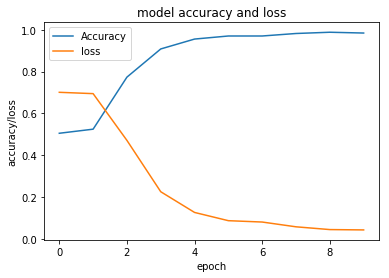

In [24]:
import matplotlib.pyplot as pltpy
pltpy.figure()
print(history.history.keys())
pltpy.plot(history.history['acc'])
pltpy.plot(history.history['loss'])
pltpy.title('model accuracy and loss')
pltpy.ylabel('accuracy/loss')
pltpy.xlabel('epoch')
pltpy.legend(['Accuracy', 'loss'], loc='upper left')


In [87]:
vocab_size = 4000
encoded_docs_test = [one_hot(d, vocab_size) for d in X_test_List_F]
max_length = 200
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')

In [88]:
print padded_docs_test

[[1633 3581 3774 ...    0    0    0]
 [1333 2792 1470 ...    0    0    0]
 [3403 2775  117 ...    0    0    0]
 ...
 [3330  793 3655 ...    0    0    0]
 [3387 1032   94 ...    0    0    0]
 [ 912    8    0 ...    0    0    0]]


In [89]:
#evaluate the model
loss, accuracy = model.evaluate(padded_docs_test, y_test)
print('Accuracy: %f' % (accuracy*100))

#pred = model.predict(padded_docs_test)

896/907 [============================>.] - ETA: 0sAccuracy: 72.657111


In [90]:
#print pred
#from sklearn.metrics import accuracy_score
#print accuracy_score(y_test, pred)
print len(padded_docs_test)
print len(y_test)

907
907


In [91]:
y_pred = model.predict(np.array(padded_docs_test))

In [92]:
y_pred_2 = []
for item in y_pred:
    x = int(round(item))
    y_pred_2.append(x)

In [93]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred_2)

0.7265711135611908


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2, target_names="PN"))

             precision    recall  f1-score   support

          P       0.68      0.81      0.74       438
          N       0.79      0.65      0.71       469

avg / total       0.74      0.73      0.73       907



In [95]:
np.mean(y_pred_2 == y_test)

0.7265711135611908

In [96]:
import itertools
import numpy as np
#import matplotlib.pyplot as pltpy

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pltpy.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pltpy.imshow(cm, interpolation='nearest', cmap=cmap)
    pltpy.title(title)
    pltpy.colorbar()
    tick_marks = np.arange(len(classes))
    pltpy.xticks(tick_marks, classes, rotation=45)
    pltpy.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pltpy.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pltpy.tight_layout()
    pltpy.ylabel('True label')
    pltpy.xlabel('Predicted label')

Confusion matrix, without normalization
[[356  82]
 [166 303]]


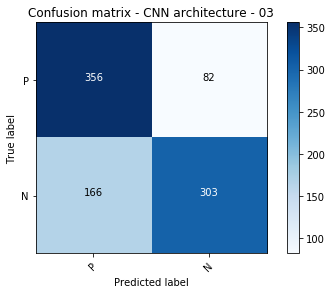

In [97]:
from sklearn.metrics import confusion_matrix
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_2)
np.set_printoptions(precision=2)

pltpy.figure()
plot_confusion_matrix(cnf_matrix, classes="PN",
                      title='Confusion matrix - CNN architecture - 03')